# Lab7-Clustering on March 11th by Mahdi

## 1st part, Introduction to the concept of Hierarchical Clustering

<br>There are two types of hierarchical clustering: Agglomerative and Divisive. 
<br>In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.
#### Data Mining Spring 2022, UVic
Reference website for Hierarchical Clustering:
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
<br>
Reference paper for Hierarchical Clustering:
https://onlinelibrary.wiley.com/doi/pdf/10.1002/widm.53?casa_token=KGHXXPEHJkMAAAAA%3A-HnQ55xq6m0CdPXTdEC5_vl8tmPc1dpwTxoZXKU3vBePy8ChPcuJ2X36KgSLgEPeeqva7uAG9ivhGrI
<br>
Scipy library website for the clustering example: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [2]:
# import library 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

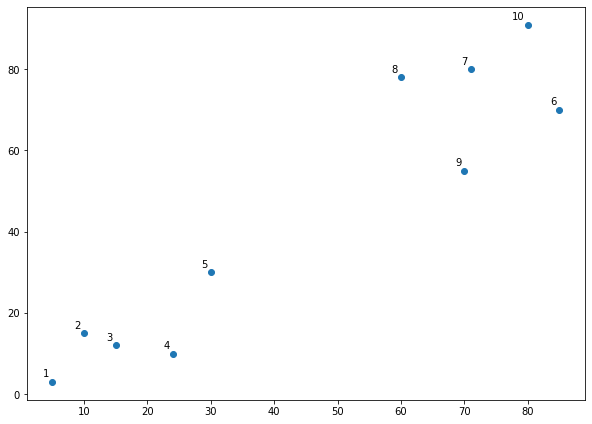

In [3]:
# Define an array for an example
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

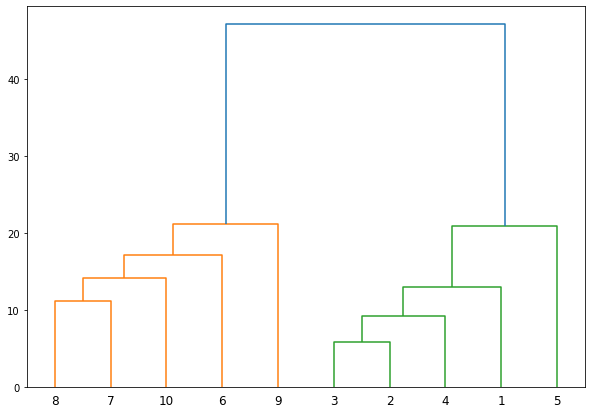

In [5]:
## scipy library for dendrograms
# https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


### - AgglomerativeClustering class from the "sklearn.cluster" library. The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). Finally, the linkage parameter is set to "ward", which minimizes the variant between the clusters.

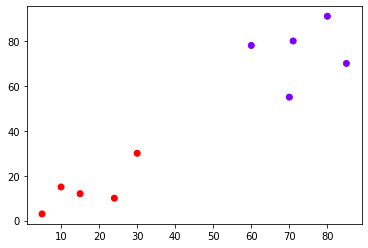

In [9]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

## 2nd part, Music Data Mining example for Hierarchical Clustering


### sci-kit learn agglomerative clustering link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

### Music Genre Dataset (.csv) info: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Dataset info : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
genre_data = pd.read_csv('features_30_sec.csv') # 10 genres 
print("Data shape:",genre_data.shape)

Data shape: (1000, 60)


In [11]:
genre_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [12]:
data = genre_data.iloc[:, 2:4].values
data

array([[0.35008812, 0.08875657],
       [0.34091359, 0.09498025],
       [0.36363718, 0.0852752 ],
       ...,
       [0.43214202, 0.0752685 ],
       [0.36248457, 0.09150553],
       [0.35840133, 0.08588409]])

In [13]:
# Normalization
from sklearn.preprocessing import MinMaxScaler 
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data) 
print(scaled)

[[0.36227871 0.69546819]
 [0.34362165 0.79339231]
 [0.38983171 0.6406919 ]
 ...
 [0.52914126 0.48324551]
 [0.3874878  0.73872059]
 [0.37918422 0.65027238]]


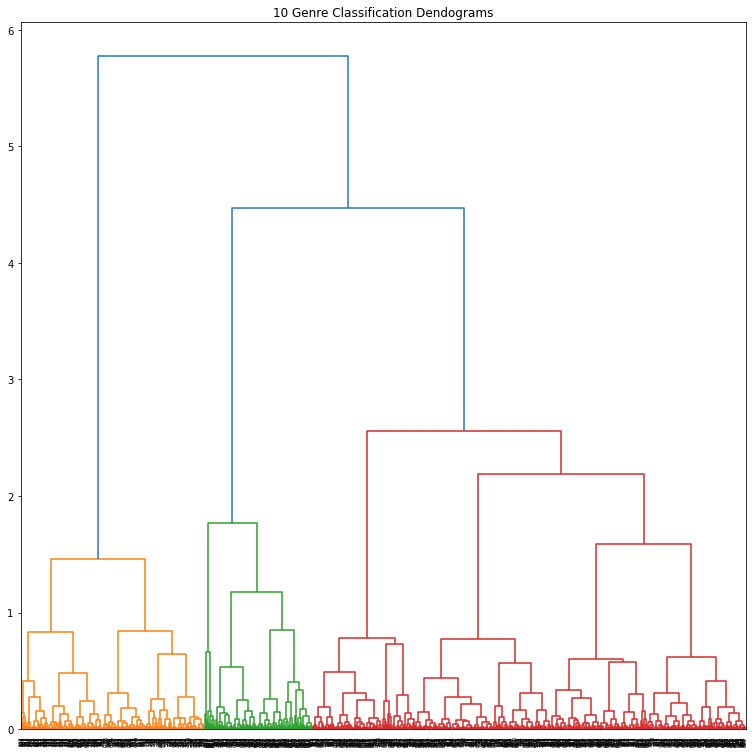

In [14]:
# scipy library for dendrograms
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(13, 13))
plt.title("10 Genre Classification Dendograms")
dend = shc.dendrogram(shc.linkage(scaled, method='ward'))

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(scaled)

array([4, 3, 4, 3, 0, 0, 0, 0, 7, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 4, 3, 4,
       4, 6, 3, 4, 4, 0, 6, 4, 3, 7, 7, 6, 6, 7, 4, 7, 7, 9, 0, 0, 4, 1,
       4, 4, 1, 1, 0, 4, 4, 4, 4, 8, 4, 7, 7, 7, 4, 4, 4, 7, 4, 0, 3, 3,
       3, 3, 3, 6, 3, 3, 3, 3, 0, 3, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 4, 4,
       0, 1, 4, 0, 0, 1, 4, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 4, 4, 7, 0, 4, 4, 7, 7, 7, 4, 9, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0,
       4, 0, 0, 0, 0, 4, 4, 7, 0, 0, 1, 4, 0, 0, 3, 4, 4, 4, 4, 9, 4, 7,
       4, 7, 4, 3, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 4, 4, 1, 4, 4, 4, 3,
       0, 0, 4, 0, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 1, 4, 6,

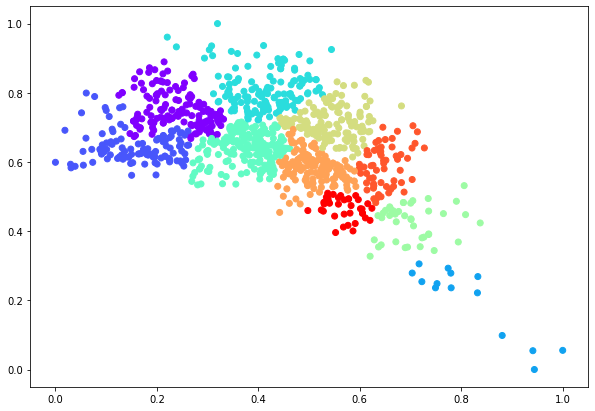

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(scaled[:,0], scaled[:,1], c=cluster.labels_, cmap='rainbow')

## 3rd part, Clustering with K-Means algorithm
### sci-kit learn agglomerative clustering link: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
<br>- The K-Means algorithm is an unsupervised clustering algorithm. It takes a bunch of unlabeled points and tries to group them into “K” number of clusters. 
<br>- K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.
<br>- The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.
<br>- In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.
### Details (especially for K-Means including the k-means++ initialization and choosing K) are in Dr. Nishant Mehta slides and textbooks: https://web.uvic.ca/~nmehta/data_mining_spring2021/lecture21_22_clustering.pdf

### Reference websites K-Means: 
1.https://becominghuman.ai/comprehending-k-means-and-knn-algorithms-c791be90883d#:~:text=The%20'K'%20in%20K%2D,learning%20algorithm%20used%20for%20classification.
<br>2.https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
<br>3.https://geodacenter.github.io/workbook/7b_clusters_2/lab7b.html#single-linkage

In [17]:
# Create dataset to compare with KMeans
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)
t.shape


(1, 1500)

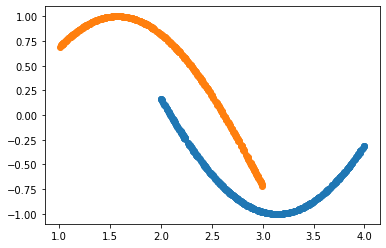

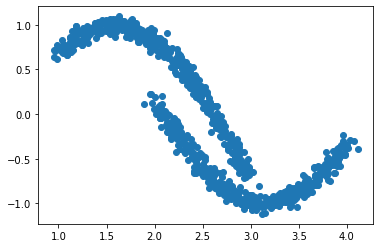

In [18]:
# Generate sample data
n_samples = 500
np.random.seed(0)
sin_x = np.random.uniform(low=1, high=3, size=(1, n_samples))
cos_x = np.random.uniform(low=2, high=4, size=(1, n_samples))
c = 2 * (np.cos(cos_x) + 0.5)
s = 2 * (np.sin(sin_x) - 0.5)

plt.scatter(cos_x, c)
plt.scatter(sin_x, s)
plt.show()

data1 = np.concatenate((cos_x, c))
data2 = np.concatenate((sin_x, s))
data = np.concatenate((data1, data2), axis=1)
data += .05 * np.random.randn(2, 2 * n_samples)
plt.scatter(data[0, :], data[1, :])
plt.show()
data = data.T


ward linkage


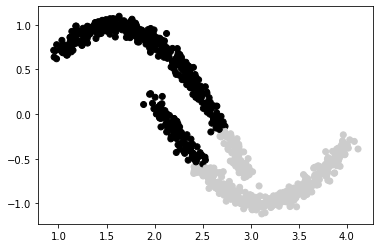

complete linkage


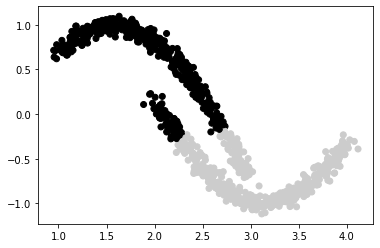

average linkage


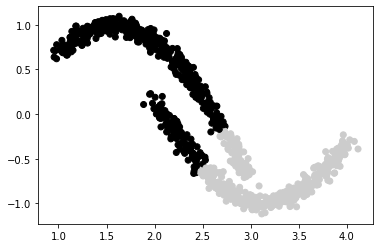

single linkage


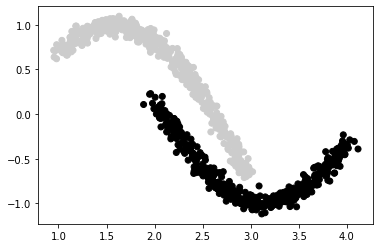

In [19]:
linkages = ['ward', 'complete', 'average', 'single']
linkages = np.array(linkages)

for i in range(len(linkages)):
    print(linkages[i],"linkage")
    model = AgglomerativeClustering(linkage=linkages[i], n_clusters=2)
    model.fit(data)
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
    plt.show()


K-Means


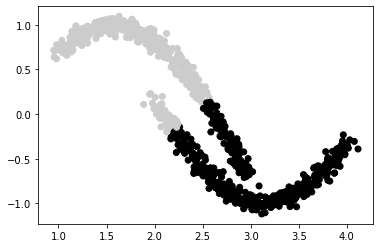

In [23]:
from sklearn.cluster import KMeans
print("K-Means")
kmeans = KMeans(n_clusters=2, max_iter=1, random_state=0).fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap=plt.cm.nipy_spectral)
plt.show()

In [24]:
#Importing all the needed libraries
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [25]:
# Dataset info : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
genre_data = pd.read_csv('features_30_sec.csv') # 10 genres 
print("Data shape:",genre_data.shape)

Data shape: (1000, 60)


In [26]:
genre_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [27]:
# Extract certain values from the genre data 
data = genre_data.iloc[:, 2:4].values
data

# Normalization
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[0.36227871 0.69546819]
 [0.34362165 0.79339231]
 [0.38983171 0.6406919 ]
 ...
 [0.52914126 0.48324551]
 [0.3874878  0.73872059]
 [0.37918422 0.65027238]]


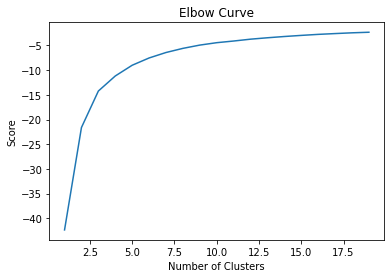

In [28]:
#Finding the optimum number of clusters for k-means clustering
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(scaled).score(scaled) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [29]:
model = KMeans(n_clusters = 10)
model.fit(scaled)

KMeans(n_clusters=10)

In [30]:
model.labels_

array([0, 6, 2, 6, 0, 0, 3, 3, 2, 3, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 6,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 2, 6, 2,
       2, 4, 6, 0, 2, 3, 4, 2, 6, 2, 9, 4, 2, 2, 2, 2, 9, 9, 3, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 8, 2, 2, 9, 9, 2, 2, 0, 9, 2, 0, 6, 6,
       6, 6, 6, 4, 6, 6, 6, 6, 3, 6, 9, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0,
       5, 0, 3, 0, 5, 0, 0, 3, 5, 5, 5, 5, 5, 5, 2, 5, 0, 0, 0, 2, 2, 0,
       0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 6, 5, 0, 5,
       0, 0, 2, 9, 3, 2, 2, 9, 9, 9, 2, 9, 3, 3, 0, 2, 2, 2, 0, 2, 2, 3,
       2, 3, 0, 3, 3, 0, 0, 2, 0, 0, 5, 0, 0, 0, 6, 2, 0, 2, 2, 9, 2, 2,
       2, 2, 2, 6, 2, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 6,
       3, 3, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 6, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 0, 0, 5, 2, 4,

In [24]:
model.cluster_centers_

array([[0.30463786, 0.66646991],
       [0.66964884, 0.43670634],
       [0.42861936, 0.63542652],
       [0.20797871, 0.78392669],
       [0.54256193, 0.7259431 ],
       [0.14439933, 0.64143874],
       [0.40988595, 0.80560708],
       [0.82241909, 0.19407954],
       [0.63317932, 0.61254788],
       [0.52671282, 0.54757501]])

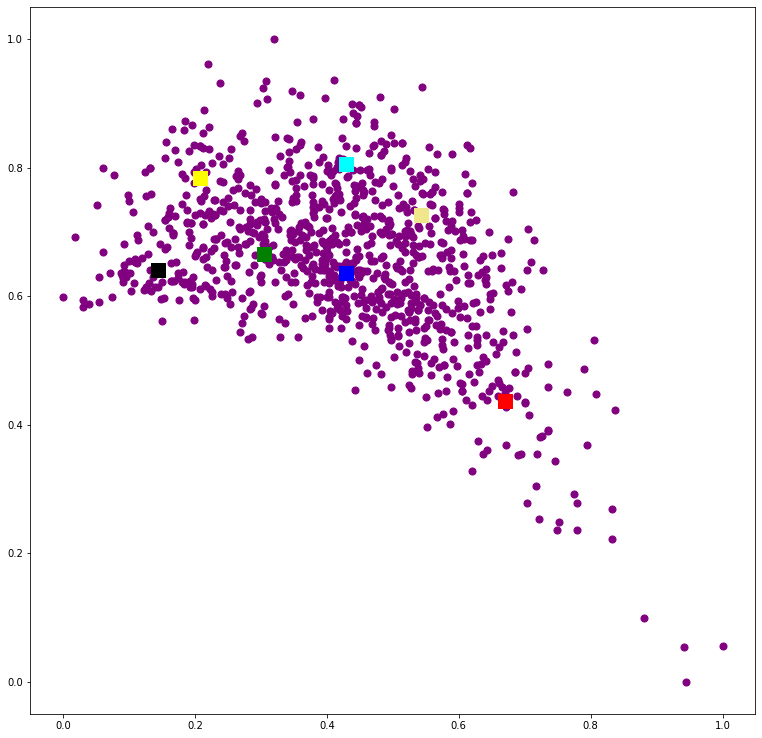

In [30]:
cluster_loc=model.cluster_centers_
plt.figure(figsize=(13, 13))
plt.scatter(scaled[ : , 0], scaled[ : , 1], s =50, c='purple')
plt.scatter(cluster_loc[0][0], cluster_loc[0][1], s=200, c='green', marker='s')
plt.scatter(cluster_loc[1][0], cluster_loc[1][1], s=200, c='red', marker='s')
plt.scatter(cluster_loc[2][0], cluster_loc[2][1], s=200, c='blue', marker='s')
plt.scatter(cluster_loc[3][0], cluster_loc[3][1], s=200, c='yellow', marker='s')
plt.scatter(cluster_loc[4][0], cluster_loc[4][1], s=200, c='khaki', marker='s')
plt.scatter(cluster_loc[5][0], cluster_loc[5][1], s=200, c='black', marker='s')
plt.scatter(cluster_loc[2][0], cluster_loc[6][1], s=200, c='cyan', marker='s')
plt.show()